# Exploratory Data Analysis for S and KH dataset

In [1]:
# importing modules that will be used

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdchem import Mol

In [2]:
# load csv file as a pandas dataframe
df = pd.read_csv('S_and_KH_data.csv')

In [3]:
# inspect first five rows of dataframe
df.head()

,InChI_Key,species,SLN,SMILES,LogS,LogKH,MW,MLOGP
0,AAEVYOVXGOFMJO-UHFFFAOYSA-N,Prometryn,S(CH3)C[6]=NC(=NC(=N@6)NHCH(CH3)CH3)NHCH(CH3)CH3,CSc1nc(NC(C)C)nc(NC(C)C)n1,-4.10,-6.709304,241.41,2.893
1,AEXMKKGTQYQZCS-UHFFFAOYSA-N,"3,3-Dimethylpentane",C(CH2CH3)(CH2CH3)(CH3)CH3,CCC(C)(C)CC,-4.23,12.129112,100.23,3.869
2,AFABGHUZZDYHJO-UHFFFAOYSA-N,2-Methylpentane,CH3CH(CH2CH2CH3)CH3,CCCC(C)C,-3.74,12.040558,86.20,3.516
3,AFBPFSWMIHJQDM-UHFFFAOYSA-N,N-Methylaniline,NH(CH3)C[7]=CHCH=CHCH=CH@7,CNc1ccccc1,-1.28,0.139262,107.17,1.859
4,AFFLGGQVNFXPEV-UHFFFAOYSA-N,1-Decene,CH2(CH2CH2CH2CH3)CH2CH2CH2CH=CH2,C=CCCCCCCCC,-5.51,12.507178,140.30,4.678


In [4]:
# quick look at summary statistics
df.describe()

,LogS,LogKH,MW,MLOGP
count,882.000000,882.000000,882.000000,882.000000
mean,-3.313564,0.712902,188.208073,2.816687
std,2.551333,6.474522,96.664434,1.707004
min,-12.950000,-34.123261,16.050000,-2.497000
25%,-4.696375,-2.833213,112.990000,1.674000
50%,-2.881500,1.832581,163.000000,2.604000
75%,-1.542500,4.699659,252.320000,3.865250
max,1.580000,13.720200,545.500000,8.657000


In [5]:
# adding a Mol column into the dataframe which can be utilised by rdkit
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Mol')

### Adding some descriptors

In [6]:
# adding number of rotatable bonds
df['NumRotatableBonds'] = [rdMolDescriptors.CalcNumRotatableBonds(row) for row in df['Mol']]

In [7]:
# adding number of Heavy atoms
df['HeavyAtomCount'] = [Mol.GetNumHeavyAtoms(row) for row in df['Mol']]

In [8]:
# adding number of aromatic atoms
df['NumAromaticAtoms'] = [sum(row.GetAtomWithIdx(i).GetIsAromatic() for i in range(row.GetNumAtoms())) for row in df['Mol']]

In [9]:
# calculating aromatic proportion (AP) descriptor
def AP(df):
    return df['NumAromaticAtoms'] / df['HeavyAtomCount']

df['AP'] = df.apply(AP, axis=1)

In [10]:
df['AP']

0      0.375000
1      0.000000
2      0.000000
3      0.750000
4      0.000000
         ...   
877    0.000000
878    0.000000
879    0.000000
880    0.428571
881    0.909091
Name: AP, Length: 882, dtype: float64

### EDA

<AxesSubplot:xlabel='LogS'>

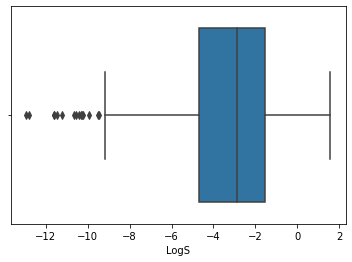

In [11]:
# box plot of solubility values to see spread of data
sns.boxplot(data=df, x='LogS')

In [21]:
# finding outliers below lower whisker of plot
lower_whisker = df.LogS.quantile(0.25) - 1.5 * (df.LogS.quantile(0.75) - df.LogS.quantile(0.25))
# lower whisker = -9.427187499999999

<AxesSubplot:xlabel='LogS', ylabel='Count'>

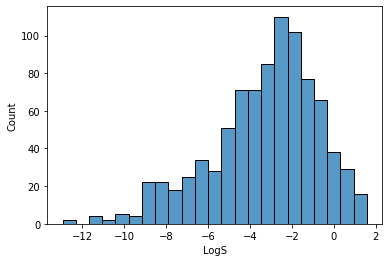

In [22]:
# histogram of solubility values to see spread of data
sns.histplot(data=df, x='LogS')

#### Looking for any trends/patterns between properties

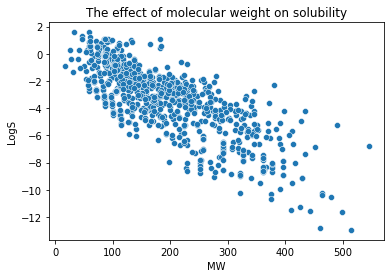

In [23]:
# LogS vs MW
sns.scatterplot(data=df, x='MW', y='LogS').set_title('The effect of molecular weight on solubility')
plt.savefig('LogS_vs_MW.png', bbox_inches='tight')

Here, there is a negative correlation where LogS decreases as MW increases.

Text(0.5, 1.0, "The effect of molecular weight on Henry's law constant")

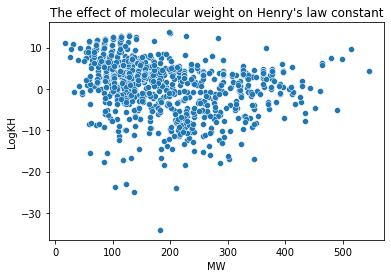

In [24]:
# LogKH vs MW
sns.scatterplot(data=df, x='MW', y='LogKH').set_title('The effect of molecular weight on Henry\'s law constant')

Not too much correlation here

Text(0.5, 1.0, 'The effect of molecular weight on Moriguchi octanol-water partition coefficient')

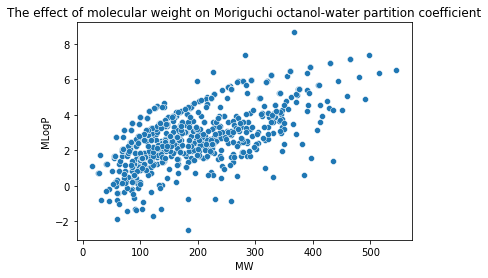

In [25]:
# MLogP vs MW

# Changing column name for easier readability
df.rename(columns={'MLOGP': 'MLogP'}, inplace=True)

sns.scatterplot(data=df, x='MW', y='MLogP').set_title('The effect of molecular weight on Moriguchi octanol-water partition coefficient')

Generally, the MLogP increases with molecular weight

Text(0.5, 1.0, 'The effect of MLogP on solubility')

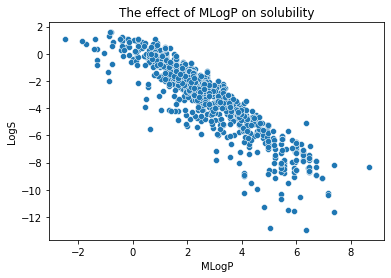

In [26]:
# LogS vs MLogP
sns.scatterplot(data=df, x='MLogP', y='LogS').set_title('The effect of MLogP on solubility')

Generally, with an increase in MLogP comes a decrease in solubility

Text(0.5, 1.0, "The effect of Henry's law constant on solubility")

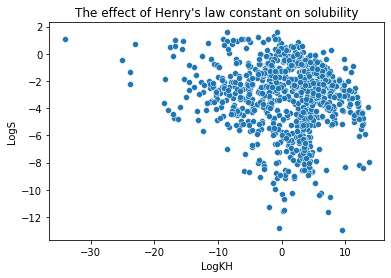

In [27]:
# LogS vs LogKH
sns.scatterplot(data=df, x='LogKH', y='LogS').set_title('The effect of Henry\'s law constant on solubility')

Not too much correlation here

Text(0.5, 1.0, 'The effect of aromatic proportion on solubility')

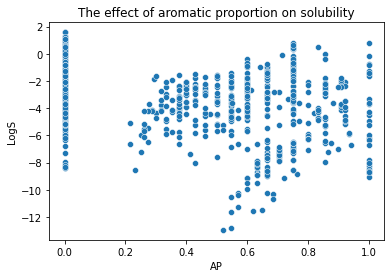

In [28]:
# LogS vs AP
sns.scatterplot(data=df, x='AP', y='LogS').set_title('The effect of aromatic proportion on solubility')

Text(0.5, 1.0, 'The effect of the number of rotatable bonds on solubility')

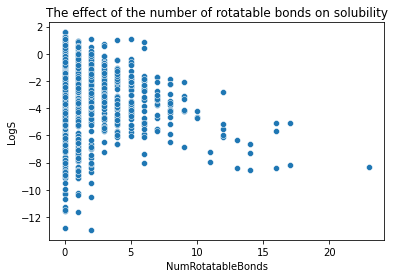

In [29]:
# LogS vs NumRotatableBonds
sns.scatterplot(data=df, x='NumRotatableBonds', y='LogS').set_title('The effect of the number of rotatable bonds on solubility')